In [1]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime as date
 
primary_type = []


In [2]:
#establishing path to the csv file
csvpath = os.path.join("clean.csv")

#creating DataFrame of csv data
crime_df = pd.read_csv(csvpath)
crime_df = pd.read_csv(csvpath, parse_dates=True ,index_col='Date')
#printing DataFrame info
crime_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,12016034,JD193556,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1434,...,32.0,22.0,11,1160263.0,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)"
2020-01-01,12220321,JD430436,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,413,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2020-01-01,12013828,JD191019,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,814,...,22.0,56.0,02,1143770.0,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)"
2020-01-01,12019692,JD197444,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1922,...,47.0,6.0,11,1164983.0,1921507.0,2020,04/01/2020 03:50:17 PM,41.940222,-87.669039,"(41.940221932, -87.669039008)"
2020-01-01,12036792,JD216459,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,...,18.0,66.0,11,1157290.0,1856526.0,2020,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)"


Find data with incomplete rows.

In [3]:
crime_df.count()

ID                      409763
Case Number             409763
Block                   409763
IUCR                    409763
Primary Type            409763
Description             409763
Location Description    409763
Arrest                  409763
Domestic                409763
Beat                    409763
District                409763
Ward                    409763
Community Area          409763
FBI Code                409763
X Coordinate            409763
Y Coordinate            409763
Year                    409763
Updated On              409763
Latitude                409763
Longitude               409763
Location                409763
dtype: int64

In [4]:
#drop all rows with missing information.
crime_df = crime_df.dropna(how='any')

#confirm new list
crime_df.count()

ID                      409763
Case Number             409763
Block                   409763
IUCR                    409763
Primary Type            409763
Description             409763
Location Description    409763
Arrest                  409763
Domestic                409763
Beat                    409763
District                409763
Ward                    409763
Community Area          409763
FBI Code                409763
X Coordinate            409763
Y Coordinate            409763
Year                    409763
Updated On              409763
Latitude                409763
Longitude               409763
Location                409763
dtype: int64

Number of each type of crime.

In [5]:
crime_df["Primary Type"].value_counts()
#crime_df['Date']= pd.to_datetime(crime_df['Date'])

BATTERY                              81731
THEFT                                79486
CRIMINAL DAMAGE                      49541
ASSAULT                              38462
DECEPTIVE PRACTICE                   30941
OTHER OFFENSE                        26034
MOTOR VEHICLE THEFT                  20385
WEAPONS VIOLATION                    17361
ROBBERY                              15749
BURGLARY                             15317
NARCOTICS                            11358
CRIMINAL TRESPASS                     7528
OFFENSE INVOLVING CHILDREN            3629
CRIMINAL SEXUAL ASSAULT               2487
SEX OFFENSE                           1914
PUBLIC PEACE VIOLATION                1861
HOMICIDE                              1601
ARSON                                 1111
INTERFERENCE WITH PUBLIC OFFICER       968
STALKING                               552
PROSTITUTION                           370
LIQUOR LAW VIOLATION                   323
CONCEALED CARRY LICENSE VIOLATION      317
INTIMIDATIO

Number of each type of crime.

In [6]:
crime_type = crime_df.groupby("Primary Type")
count_crime_types = crime_type["Primary Type"].count()
count_crime_types

Primary Type
ARSON                                 1111
ASSAULT                              38462
BATTERY                              81731
BURGLARY                             15317
CONCEALED CARRY LICENSE VIOLATION      317
CRIM SEXUAL ASSAULT                     75
CRIMINAL DAMAGE                      49541
CRIMINAL SEXUAL ASSAULT               2487
CRIMINAL TRESPASS                     7528
DECEPTIVE PRACTICE                   30941
GAMBLING                                38
HOMICIDE                              1601
HUMAN TRAFFICKING                       17
INTERFERENCE WITH PUBLIC OFFICER       968
INTIMIDATION                           278
KIDNAPPING                             205
LIQUOR LAW VIOLATION                   323
MOTOR VEHICLE THEFT                  20385
NARCOTICS                            11358
NON-CRIMINAL                             5
OBSCENITY                               97
OFFENSE INVOLVING CHILDREN            3629
OTHER NARCOTIC VIOLATION                 

                     Crime Type
Primary Type                   
BATTERY                   81731
THEFT                     79486
CRIMINAL DAMAGE           49541
ASSAULT                   38462
DECEPTIVE PRACTICE        30941
OTHER OFFENSE             26034
MOTOR VEHICLE THEFT       20385
WEAPONS VIOLATION         17361
ROBBERY                   15749
BURGLARY                  15317


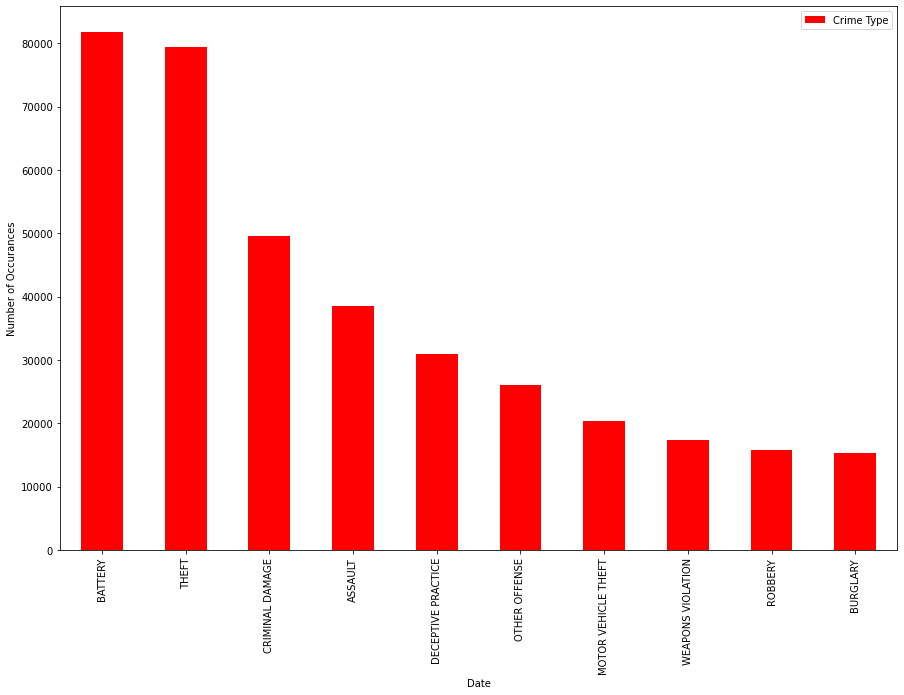

<Figure size 432x288 with 0 Axes>

In [7]:

crime_type = crime_df.groupby("Primary Type")
count_crime_types = crime_type["Primary Type"].count()

total_crimetype_df = pd.DataFrame({"Crime Type": count_crime_types})
# total_crimetype_df

top_ten_crimes = total_crimetype_df.sort_values(by = ['Crime Type'], ascending = False)[:10]

top_ten_crimes.reset_index()

print(top_ten_crimes)

top_ten_crime_chart = top_ten_crimes.plot(kind='bar', figsize = (15, 10), color=["r"])

top_ten_crime_chart.set_xlabel("Date")
top_ten_crime_chart.set_ylabel("Number of Occurances")
#f, ax = plt.subplots(1, 1, figsize = (15, 10))

plt.show()
plt.tight_layout()


In [8]:
crime_jan_2020_df = crime_df.loc['2020-01-01':'2020-01-31']
crime_jan_2020_df

cj20 = crime_jan_2020_df.size / 21

print(cj20)

19551.0


In [9]:
crime_feb_2020_df = crime_df.loc['2020-02-01':'2020-02-28']
crime_feb_2020_df

cf20 = crime_feb_2020_df.size / 21

print(cf20)



17376.0


In [10]:
crime_mar_2020_df = crime_df.loc['2020-03-01':'2020-03-31']
crime_mar_2020_df

cmr20 = crime_mar_2020_df.size / 21

print(cmr20)

16433.0


In [11]:
crime_apr_2020_df = crime_df.loc['2020-04-01':'2020-04-30']
crime_apr_2020_df

cap20 = crime_apr_2020_df.size / 21

print(cap20)

12632.0


In [12]:
crime_may_2020_df = crime_df.loc['2020-05-01':'2020-05-31']
crime_may_2020_df

cm20 = crime_may_2020_df.size / 21

print(cm20)

17291.0


In [13]:
crime_june_2020_df = crime_df.loc['2020-06-01':'2020-06-30']

crime_june_2020_df

cjn20 = crime_june_2020_df.size / 21

print(cjn20)

17324.0


In [14]:
crime_july_2020_df = crime_df.loc['2020-07-01':'2020-07-31']
crime_july_2020_df

cjl20 = crime_july_2020_df.size / 21

print(cjl20)



19241.0


In [15]:
crime_aug_2020_df = crime_df.loc['2020-08-01':'2020-08-31']
crime_aug_2020_df

ca20 = crime_aug_2020_df.size / 21

print(ca20)

19540.0


In [16]:
crime_sep_2020_df = crime_df.loc['2020-09-01':'2020-09-30']
crime_sep_2020_df

cs20 = crime_sep_2020_df.size / 21

print(cs20)

17521.0


In [17]:
crime_oct_2020_df = crime_df.loc['2020-10-01':'2020-10-31']
crime_oct_2020_df

co20 = crime_oct_2020_df.size / 21

print(co20)

17957.0


In [18]:
crime_nov_2020_df = crime_df.loc['2020-11-01':'2020-11-30']
crime_nov_2020_df

cn20 = crime_nov_2020_df.size / 21

print(cn20) 

16138.0


In [19]:
crime_dec_2020_df = crime_df.loc['2020-12-01':'2020-12-31']
crime_dec_2020_df

cd20 = crime_dec_2020_df.size / 21

print(cd20)

15839.0


In [20]:
crime_jan_2021_df = crime_df.loc['2021-01-01':'2021-01-31']
crime_jan_2021_df

cj21 = crime_jan_2021_df.size / 21

print(cj21)

15831.0


In [21]:
crime_feb_2021_df = crime_df.loc['2021-02-01':'2021-02-28']
crime_feb_2021_df

cf21 = crime_feb_2021_df.size / 21

print(cf21)

12740.0


In [22]:
crime_mar_2021_df = crime_df.loc['2021-03-01':'2021-03-31']
crime_mar_2021_df

cmr21 = crime_mar_2021_df.size / 21

print(cmr21)

15586.0


In [23]:
crime_apr_2021_df = crime_df.loc['2021-04-01':'2021-04-30']
crime_apr_2021_df

cap21 = crime_apr_2021_df.size / 21



In [24]:
crime_may_2021_df = crime_df.loc['2021-05-01':'2021-05-31']
crime_may_2021_df

cm21 = crime_may_2021_df.size / 21



In [25]:
crime_jun_2021_df = crime_df.loc['2021-06-01':'2021-06-30']
crime_jun_2021_df

cjn21 = crime_jun_2021_df.size / 21



In [26]:
crime_jul_2021_df = crime_df.loc['2021-07-01':'2021-07-31']
crime_jul_2021_df

cjl21 = crime_jul_2021_df.size / 21



In [27]:
crime_aug_2021_df = crime_df.loc['2021-08-01':'2021-08-31']
crime_aug_2021_df

ca21 = crime_aug_2021_df.size / 21



In [28]:
crime_sep_2021_df = crime_df.loc['2021-09-01':'2021-09-30']
crime_sep_2021_df

cs21 = crime_sep_2021_df.size / 21



In [29]:
crime_oct_2021_df = crime_df.loc['2021-10-01':'2021-10-31']

crime_oct_2021_df

co21 = crime_oct_2021_df.size / 21



In [30]:
crime_nov_2021_df = crime_df.loc['2021-11-01':'2021-11-30']

crime_nov_2021_df

cn21 = crime_nov_2021_df.size / 21



In [31]:
crime_dec_2021_df = crime_df.loc['2021-12-01':'2021-12-31']

crime_dec_2021_df

cd21 = crime_dec_2021_df.size / 21



Text(0.5, 1.0, '2021 Crime')

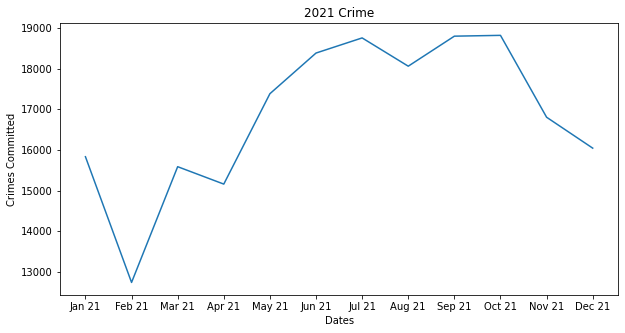

In [32]:


x = np.array(['Jan 21' , 'Feb 21' , 'Mar 21' , 'Apr 21' , 'May 21' , 'Jun 21' , 'Jul 21' , 'Aug 21' , 'Sep 21' , 'Oct 21' , 'Nov 21' , 'Dec 21'])

y = np.array([cj21 , cf21 , cmr21 , cap21 , cm21 , cjn21 , cjl21 , ca21 , cs21 , co21 , cn21 , cd21])

fig = plt.figure(figsize = (10,5))

plt.plot(x,y)

plt.xlabel("Dates")  
plt.ylabel("Crimes Committed")  
plt.title("2021 Crime")  




Text(0.5, 1.0, '2020 Crime')

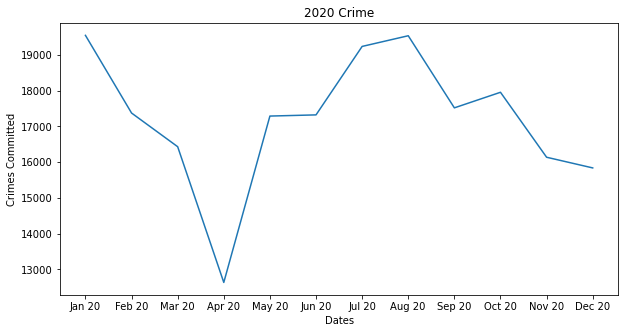

In [33]:
x = np.array(['Jan 20' , 'Feb 20' , 'Mar 20' , 'Apr 20' , 'May 20' , 'Jun 20' , 'Jul 20' , 'Aug 20' , 'Sep 20' , 'Oct 20' , 'Nov 20' , 'Dec 20'])

y = np.array([cj20 , cf20 , cmr20 , cap20 , cm20 , cjn20 , cjl20 , ca20 , cs20 , co20 , cn20 , cd20])

fig = plt.figure(figsize = (10,5))

plt.plot(x,y)

plt.xlabel("Dates")  
plt.ylabel("Crimes Committed")  
plt.title("2020 Crime") 

Text(0.5, 1.0, '2020 to 2021 Crime')

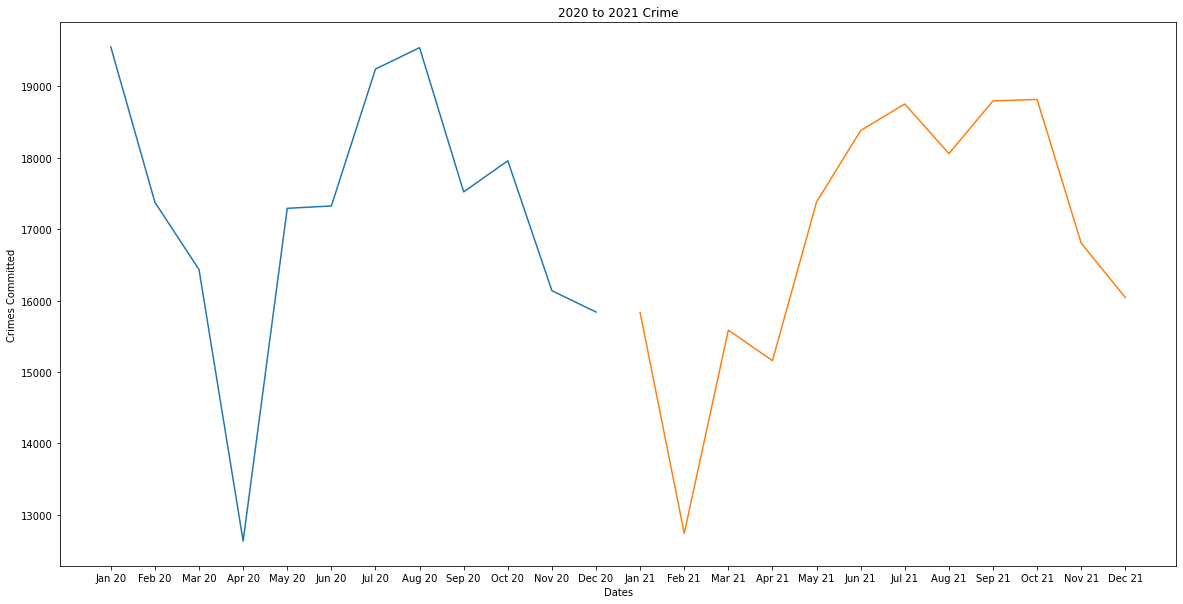

In [34]:

x = np.array(['Jan 21' , 'Feb 21' , 'Mar 21' , 'Apr 21' , 'May 21' , 'Jun 21' , 'Jul 21' , 'Aug 21' , 'Sep 21' , 'Oct 21' , 'Nov 21' , 'Dec 21'])

y = np.array([cj21 , cf21 , cmr21 , cap21 , cm21 , cjn21 , cjl21 , ca21 , cs21 , co21 , cn21 , cd21])

w = np.array(['Jan 20' , 'Feb 20' , 'Mar 20' , 'Apr 20' , 'May 20' , 'Jun 20' , 'Jul 20' , 'Aug 20' , 'Sep 20' , 'Oct 20' , 'Nov 20' , 'Dec 20'])

z = np.array([cj20 , cf20 , cmr20 , cap20 , cm20 , cjn20 , cjl20 , ca20 , cs20 , co20 , cn20 , cd20])

fig = plt.figure(figsize = (20,10))

plt.plot(w,z)

plt.plot(x,y)

plt.xlabel("Dates")  
plt.ylabel("Crimes Committed")  
plt.title("2020 to 2021 Crime") 

Text(0.5, 1.0, '2020 to 2021 Crime')

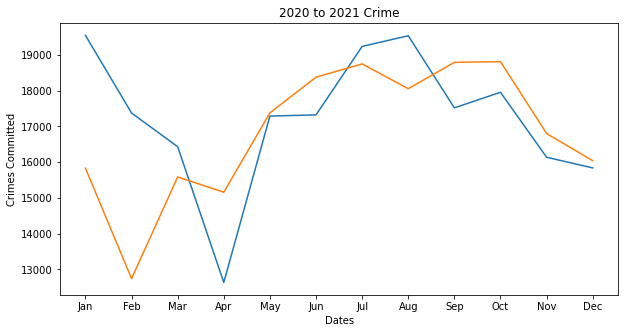

In [35]:
x = np.array(['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])

y = np.array([cj21 , cf21 , cmr21 , cap21 , cm21 , cjn21 , cjl21 , ca21 , cs21 , co21 , cn21 , cd21])

z = np.array([cj20 , cf20 , cmr20 , cap20 , cm20 , cjn20 , cjl20 , ca20 , cs20 , co20 , cn20 , cd20])

fig = plt.figure(figsize = (10,5))

plt.plot(x,z)

plt.plot(x,y)

plt.xlabel("Dates")  
plt.ylabel("Crimes Committed")  
plt.title("2020 to 2021 Crime")